# SMS Classifier

# 

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Importing Dataset

In [2]:
sms=pd.read_csv("C:/Users/Pranab Kumar Sahoo/Downloads/spam.csv",encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data preprocessing

In [3]:
sms.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
sms.columns=['Category','Message']

In [6]:
sms.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
sms['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category'>

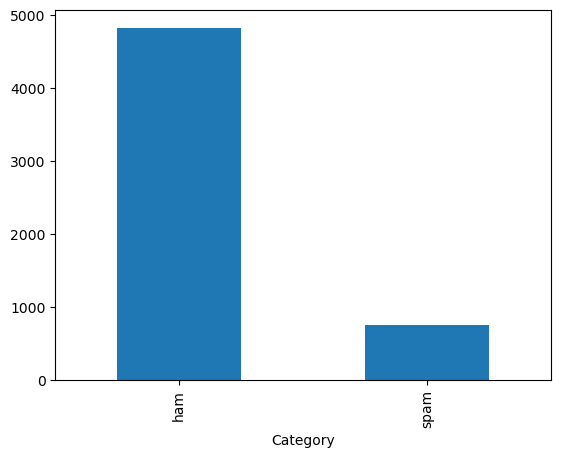

In [9]:
sms['Category'].value_counts().plot(kind='bar')

In [10]:
sms['spam']=sms['Category'].apply(lambda x:1 if x=='spam' else 0)

In [11]:
sms.columns

Index(['Category', 'Message', 'spam'], dtype='object')

In [12]:
sms.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# Model selection 

In [13]:
x=np.array(sms["Message"])
y=np.array(sms["spam"])
cv=CountVectorizer()
X=cv.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=50)
clf=MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

# Result || Detection

In [14]:
sample=input('Enter a message')
data=cv.transform([sample]).toarray()
print(clf.predict(data))

Enter a messageGo until jurong point, crazy.. Available only ...	
[0]


In [15]:
clf.score(X_test,y_test)

0.9713261648745519

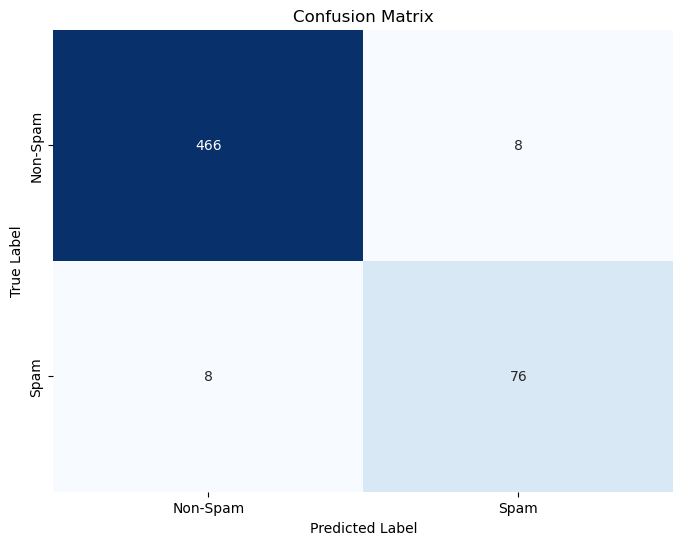

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions on the test set
y_pred = clf.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()